# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Import, Load, and Display Dataset

In [ ]:
# Define file path
hcc_filepath = '/content/hcc-dataCSV.csv'

# Load datasets
hcc_df = pd.read_csv(hcc_filepath)
df = pd.read_csv(hcc_filepath)

# Display the first few rows of the dataset to verify they were loaded correctly
print("HCC Dataset:")
print(df.head())

# Optional: Display basic information about the dataset
print("\nHCC Dataset Info:")
print(df.info())

HCC Dataset:
   Gender Symptoms  Alcohol Hepatitis B Surface Antigen (HBsAg)  \
0       1        0        1                                   0   
1       0        ?        0                                   0   
2       1        0        1                                   1   
3       1        1        1                                   0   
4       1        1        1                                   1   

  Hepatitis B e Antigen (HBeAg) Hepatitis B Core Antibody (HBcAb)  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 1   
3                             0                                 0   
4                             0                                 1   

  Hepatitis C Virus Antibody (HCVAb)  Cirrhosis Endemic Countries (Endemic)  \
0                                  0          1                           0   
1          

# Data Preprocessing

### Checking for numerical and categorical columns

In [ ]:
# Threshold for the maximum unique values to consider a column as categorical
CATEGORICAL_THRESHOLD = 5

# Initialize trackers
categorical_columns = []
numerical_columns = []

for column in df.drop(columns='Class Attribute (Class)').columns:
    # Remove '?' and NaN values
    filtered_values = df[column][df[column] != '?'].dropna()

    # Try converting the filtered values to numeric
    try:
        numeric_values = pd.to_numeric(filtered_values)
        # Check if all values are integers
        if (numeric_values == numeric_values.astype(int)).all():
            # Check if the number of unique values is below the threshold
            if numeric_values.nunique() <= CATEGORICAL_THRESHOLD:
                categorical_columns.append(column)
            else:
                numerical_columns.append(column)
        else:
            numerical_columns.append(column)
    except ValueError:
        # If conversion fails, it's not a numerical column
        pass

print(categorical_columns)
print(numerical_columns)

['Gender', 'Symptoms', 'Alcohol', 'Hepatitis B Surface Antigen (HBsAg)', 'Hepatitis B e Antigen (HBeAg)', 'Hepatitis B Core Antibody (HBcAb)', 'Hepatitis C Virus Antibody (HCVAb)', 'Cirrhosis', 'Endemic Countries (Endemic)', 'Smoking', 'Diabetes', 'Obesity', 'Hemochromatosis (Hemochro)', 'Arterial Hypertension (AHT)', 'Chronic Renal Insufficiency (CRI)', 'Human Immunodeficiency Virus (HIV)', 'Nonalcoholic Steatohepatitis (NASH)', 'Esophageal Varices (Varices)', 'Splenomegaly (Spleno)', 'Portal Hypertension (PHT)', 'Portal Vein Thrombosis (PVT)', 'Liver Metastasis (Metastasis)', 'Radiological Hallmark (Hallmark)', 'Performance Status (PS)', 'Encephalopathy degree', 'Ascites degree']
['Age at diagnosis (Age)', 'Grams of Alcohol per day (Grams/day)', 'Packs of cigarettes per year (Packs/year)', 'International Normalised Ratio (INR)', 'Alpha-Fetoprotein (AFP)', 'Hemoglobin', 'Mean Corpuscular Volume (MCV)', 'Leukocytes', 'Platelets', 'Albumin', 'Total Bilirubin (Total Bil)', 'Alanine Trans

### Checking for missing values

In [ ]:
print("\nMissing Data HCC Dataset:")

# Count Null/NaN values
print("Count of Null/NaN values in each column:")
print(df.isnull().sum())

# Count '?' placeholders in each column
print("\nCount of '?' in each column:")
print((df == '?').sum())


Missing Data HCC Dataset:
Count of Null/NaN values in each column:
Gender                                       0
Symptoms                                     0
Alcohol                                      0
Hepatitis B Surface Antigen (HBsAg)          0
Hepatitis B e Antigen (HBeAg)                0
Hepatitis B Core Antibody (HBcAb)            0
Hepatitis C Virus Antibody (HCVAb)           0
Cirrhosis                                    0
Endemic Countries (Endemic)                  0
Smoking                                      0
Diabetes                                     0
Obesity                                      0
Hemochromatosis (Hemochro)                   0
Arterial Hypertension (AHT)                  0
Chronic Renal Insufficiency (CRI)            0
Human Immunodeficiency Virus (HIV)           0
Nonalcoholic Steatohepatitis (NASH)          0
Esophageal Varices (Varices)                 0
Splenomegaly (Spleno)                        0
Portal Hypertension (PHT)              

### Handling missing values

In [ ]:
# Remove the specified columns from categorical and numerical trackers
categorical_columns = [col for col in categorical_columns]
numerical_columns = [col for col in numerical_columns]

print("")
# Imputation
for column in categorical_columns:
    # Replace '?' with mode for categorical columns
    df[column] = df[column].replace('?', np.nan)
    mode_value = df[column].mode().iloc[0]
    df[column] = df[column].fillna(mode_value)

for column in numerical_columns:
    # Replace '?' with NaN for numerical columns
    df[column] = df[column].replace('?', np.nan)
    df[column] = pd.to_numeric(df[column], errors='coerce')
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)
print("")

# Count Null/NaN values
print("Count of Null/NaN values in each column after imputation:")
print(df.isnull().sum())

# Count '?' placeholders in each column
print("\nCount of '?' in each column after imputation:")
print((df == '?').sum())

print(df.head())



Count of Null/NaN values in each column after imputation:
Gender                                       0
Symptoms                                     0
Alcohol                                      0
Hepatitis B Surface Antigen (HBsAg)          0
Hepatitis B e Antigen (HBeAg)                0
Hepatitis B Core Antibody (HBcAb)            0
Hepatitis C Virus Antibody (HCVAb)           0
Cirrhosis                                    0
Endemic Countries (Endemic)                  0
Smoking                                      0
Diabetes                                     0
Obesity                                      0
Hemochromatosis (Hemochro)                   0
Arterial Hypertension (AHT)                  0
Chronic Renal Insufficiency (CRI)            0
Human Immunodeficiency Virus (HIV)           0
Nonalcoholic Steatohepatitis (NASH)          0
Esophageal Varices (Varices)                 0
Splenomegaly (Spleno)                        0
Portal Hypertension (PHT)                    0


### Check for duplicates

In [ ]:
print("\nDuplicate Rows in HCC Dataset:")
print(df.duplicated().sum())


Duplicate Rows in HCC Dataset:
0


### Converting categorical columns into numerical columns

In [ ]:
# Convert the columns to numeric
for column in df.columns:
    df[column] = pd.to_numeric(df[column])

### Check for inconsistencies

In [ ]:
# Check for data types in each column
print("\nData types of columns:")
print(df.dtypes)
print(df.describe(include='all'))


Data types of columns:
Gender                                         int64
Symptoms                                       int64
Alcohol                                        int64
Hepatitis B Surface Antigen (HBsAg)            int64
Hepatitis B e Antigen (HBeAg)                  int64
Hepatitis B Core Antibody (HBcAb)              int64
Hepatitis C Virus Antibody (HCVAb)             int64
Cirrhosis                                      int64
Endemic Countries (Endemic)                    int64
Smoking                                        int64
Diabetes                                       int64
Obesity                                        int64
Hemochromatosis (Hemochro)                     int64
Arterial Hypertension (AHT)                    int64
Chronic Renal Insufficiency (CRI)              int64
Human Immunodeficiency Virus (HIV)             int64
Nonalcoholic Steatohepatitis (NASH)            int64
Esophageal Varices (Varices)                   int64
Splenomegaly (Spleno) 

# Data Splitting

In [ ]:
X = df.drop(columns=['Class Attribute (Class)'])  # Features
y = df['Class Attribute (Class)']  # Target

# Split the dataset into training and testing sets with stratification, and set a random seed
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 80:20 split
    stratify=y,     # Stratify based on target column
    random_state=177  # Set random seed for reproducibility
)

# Combine the X_train, X_test with their respective y_train, y_test if you need full DataFrames
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Print the data
print("Training set:")
print(train_df.head())
print("Test set:")
print(test_df.head())

Training set:
     Gender  Symptoms  Alcohol  Hepatitis B Surface Antigen (HBsAg)  \
131       0         0        1                                    0   
163       1         0        1                                    1   
3         1         1        1                                    0   
143       1         0        1                                    0   
49        1         1        1                                    0   

     Hepatitis B e Antigen (HBeAg)  Hepatitis B Core Antibody (HBcAb)  \
131                              0                                  0   
163                              0                                  1   
3                                0                                  0   
143                              0                                  0   
49                               0                                  1   

     Hepatitis C Virus Antibody (HCVAb)  Cirrhosis  \
131                                   0          1   
163         

# Data Normalization

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize only the numerical columns in the training set
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Normalize the same numerical columns in the test set using the same scaler (without fitting)
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Combine the X_train, X_test with their respective y_train, y_test if you need full DataFrames
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Print the normalized data
print("Normalized training set:")
print(train_df.head())
print("Normalized test set:")
print(test_df.head())

Normalized training set:
     Gender  Symptoms  Alcohol  Hepatitis B Surface Antigen (HBsAg)  \
131       0         0        1                                    0   
163       1         0        1                                    1   
3         1         1        1                                    0   
143       1         0        1                                    0   
49        1         1        1                                    0   

     Hepatitis B e Antigen (HBeAg)  Hepatitis B Core Antibody (HBcAb)  \
131                              0                                  0   
163                              0                                  1   
3                                0                                  0   
143                              0                                  0   
49                               0                                  1   

     Hepatitis C Virus Antibody (HCVAb)  Cirrhosis  \
131                                   0          1   
1

# Without Feature Selection

## SMOTE

In [ ]:
smote = SMOTE(random_state=177)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6061

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.67      0.70      0.68        20

    accuracy                           0.61        33
   macro avg       0.58      0.58      0.58        33
weighted avg       0.60      0.61      0.60        33


Confusion Matrix:
[[ 6  7]
 [ 6 14]]


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.6061

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.67      0.70      0.68        20

    accuracy                           0.61        33
   macro avg       0.58      0.58      0.58        33
weighted avg       0.60      0.61      0.60        33


Confusion Matrix:
[[ 6  7]
 [ 6 14]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7273

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.79      0.75      0.77        20

    accuracy                           0.73        33
   macro avg       0.72      0.72      0.72        33
weighted avg       0.73      0.73      0.73        33


Confusion Matrix:
[[ 9  4]
 [ 5 15]]


## Without SMOTE

### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.7273

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.74      0.85      0.79        20

    accuracy                           0.73        33
   macro avg       0.72      0.69      0.70        33
weighted avg       0.72      0.73      0.72        33


Confusion Matrix:
[[ 7  6]
 [ 3 17]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7879

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.74      1.00      0.85        20

    accuracy                           0.79        33
   macro avg       0.87      0.73      0.74        33
weighted avg       0.84      0.79      0.76        33


Confusion Matrix:
[[ 6  7]
 [ 0 20]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7576

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.80      0.80      0.80        20

    accuracy                           0.76        33
   macro avg       0.75      0.75      0.75        33
weighted avg       0.76      0.76      0.76        33


Confusion Matrix:
[[ 9  4]
 [ 4 16]]


In [ ]:
smote = SMOTE(random_state=177)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# With Feature Selection (Correlation)

In [ ]:
# Step 1: Compute correlations with the target variable
target = 'Class Attribute (Class)'  # Replace with the name of your target variable
correlations = train_df[numerical_columns + [target]].corr()[target].drop(target) # Correlation of all features with target

# Filter features with correlation > 0.2
selected_features = correlations[correlations.abs() > 0.2].index.tolist()
print("Numerical Columns with High Correlation to Target:")
print(correlations[selected_features])

# Step 2: Check for multicollinearity among selected features
# Create a DataFrame for correlations among selected features
selected_corr = train_df[selected_features].corr()

# Initialize a list to keep the final selected features
selected_numerical_columns_correlation = selected_features[:]

# Step 3: Remove multicollinear features
for feature in selected_features:
    if feature in selected_numerical_columns_correlation:  # Only process features not yet removed
        high_corr_features = selected_corr[feature][selected_corr[feature] > 0.9].index.tolist()  # Threshold for multicollinearity
        high_corr_features.remove(feature)  # Exclude itself

        # Remove features with high correlation, retaining the one with the highest target correlation
        for high_corr_feature in high_corr_features:
            if high_corr_feature in selected_numerical_columns_correlation:
                # Retain the feature with higher correlation to the target
                if correlations[high_corr_feature] < correlations[feature]:
                    selected_numerical_columns_correlation.remove(high_corr_feature)

chi2_results = []

# Iterate through each categorical column
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(train_df[column], train_df[target])

    # Perform Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Store results
    chi2_results.append({'Column': column, 'Chi2_Statistic': chi2_stat, 'P_Value': p_value})

# Convert results to DataFrame
chi2_df = pd.DataFrame(chi2_results)

print("Chi-Square Correlation for Categorical Columns:")
print(chi2_df)

# Filter Categorical Columns Based on Chi-Square
chi2_threshold = 0.05
selected_categorical_columns_correlation = chi2_df[chi2_df["P_Value"] < chi2_threshold]["Column"].tolist()

print("Selected Numerical Columns:", selected_numerical_columns_correlation)
print("Selected Categorical Columns:", selected_categorical_columns_correlation)

# Combine numerical and categorical selected columns
selected_features_correlation = selected_numerical_columns_correlation + selected_categorical_columns_correlation

print(selected_features_correlation)

# Create X_train and X_test with only the selected features
X_train_correlation = X_train[selected_features_correlation]
X_test_correlation = X_test[selected_features_correlation]

Numerical Columns with High Correlation to Target:
Hemoglobin                      0.279554
Albumin                         0.246888
Total Bilirubin (Total Bil)    -0.239685
Aspartate Transaminase (AST)   -0.224151
Alkaline Phosphatase (ALP)     -0.305587
Direct Bilirubin (Dir. Bil)    -0.248014
Ferritin                       -0.339249
Name: Class Attribute (Class), dtype: float64
Chi-Square Correlation for Categorical Columns:
                                 Column  Chi2_Statistic   P_Value
0                                Gender        0.547764  0.459233
1                              Symptoms        7.431231  0.006410
2                               Alcohol        0.276563  0.598963
3   Hepatitis B Surface Antigen (HBsAg)        0.038106  0.845230
4         Hepatitis B e Antigen (HBeAg)        0.062916  0.801946
5     Hepatitis B Core Antibody (HBcAb)        0.002167  0.962871
6    Hepatitis C Virus Antibody (HCVAb)        1.431024  0.231597
7                             Cirrhosis 

## SMOTE

In [ ]:
smote = SMOTE(random_state=177)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_correlation, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_correlation)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.7576

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.75      0.90      0.82        20

    accuracy                           0.76        33
   macro avg       0.76      0.72      0.73        33
weighted avg       0.76      0.76      0.75        33


Confusion Matrix:
[[ 7  6]
 [ 2 18]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_correlation)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7576

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.77      0.85      0.81        20

    accuracy                           0.76        33
   macro avg       0.75      0.73      0.74        33
weighted avg       0.75      0.76      0.75        33


Confusion Matrix:
[[ 8  5]
 [ 3 17]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_correlation)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.77      0.65        13
           1       0.80      0.60      0.69        20

    accuracy                           0.67        33
   macro avg       0.68      0.68      0.67        33
weighted avg       0.70      0.67      0.67        33


Confusion Matrix:
[[10  3]
 [ 8 12]]


## Without SMOTE

### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_correlation, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_correlation)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.7576

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.75      0.90      0.82        20

    accuracy                           0.76        33
   macro avg       0.76      0.72      0.73        33
weighted avg       0.76      0.76      0.75        33


Confusion Matrix:
[[ 7  6]
 [ 2 18]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_correlation, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_correlation)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7273

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.74      0.85      0.79        20

    accuracy                           0.73        33
   macro avg       0.72      0.69      0.70        33
weighted avg       0.72      0.73      0.72        33


Confusion Matrix:
[[ 7  6]
 [ 3 17]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_correlation, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_correlation)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.74      0.70      0.72        20

    accuracy                           0.67        33
   macro avg       0.65      0.66      0.66        33
weighted avg       0.67      0.67      0.67        33


Confusion Matrix:
[[ 8  5]
 [ 6 14]]


# With Feature Selection [using XGB]


In [ ]:
# Initialize the XGBoost classifier
xgb_fs = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Fit the model to the training data
xgb_fs.fit(X_train, y_train)

# Get feature importances
importances = xgb_fs.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Select features based on a threshold (e.g., median importance)
threshold = np.median(importances)
selected_features_xgb = feature_importances[feature_importances['Importance'] > threshold]['Feature']
print("\nSelected Features:")
print(selected_features_xgb)

# Reduce the training and test datasets to the selected features
X_train_xgb = X_train[selected_features_xgb]
X_test_xgb = X_test[selected_features_xgb]

Feature Importances:
                                      Feature  Importance
9                                     Smoking    0.088096
26                    Performance Status (PS)    0.086923
30                    Alpha-Fetoprotein (AFP)    0.085999
40                 Alkaline Phosphatase (ALP)    0.065843
48                                   Ferritin    0.062252
46                                       Iron    0.057214
1                                    Symptoms    0.045396
24       Grams of Alcohol per day (Grams/day)    0.042527
14          Chronic Renal Insufficiency (CRI)    0.039012
39           Gamma Glutamyl Transferase (GGT)    0.037264
31                                 Hemoglobin    0.031283
23                     Age at diagnosis (Age)    0.030918
29       International Normalised Ratio (INR)    0.028303
44      Major Dimension of Nodule (Major Dim)    0.025767
41                        Total Proteins (TP)    0.024193
28                             Ascites degree    0.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## SMOTE

In [ ]:
smote = SMOTE(random_state=177)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_xgb, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6364

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.70      0.70      0.70        20

    accuracy                           0.64        33
   macro avg       0.62      0.62      0.62        33
weighted avg       0.64      0.64      0.64        33


Confusion Matrix:
[[ 7  6]
 [ 6 14]]


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_xgb)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.6364

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.68      0.75      0.71        20

    accuracy                           0.64        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.63      0.64      0.63        33


Confusion Matrix:
[[ 6  7]
 [ 5 15]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_xgb)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.6970

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.85      0.69        13
           1       0.86      0.60      0.71        20

    accuracy                           0.70        33
   macro avg       0.72      0.72      0.70        33
weighted avg       0.75      0.70      0.70        33


Confusion Matrix:
[[11  2]
 [ 8 12]]


## Without SMOTE

### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_xgb, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.6364

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.68      0.75      0.71        20

    accuracy                           0.64        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.63      0.64      0.63        33


Confusion Matrix:
[[ 6  7]
 [ 5 15]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_xgb, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_xgb)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7576

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.75      0.90      0.82        20

    accuracy                           0.76        33
   macro avg       0.76      0.72      0.73        33
weighted avg       0.76      0.76      0.75        33


Confusion Matrix:
[[ 7  6]
 [ 2 18]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_xgb, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_xgb)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7879

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.88      0.75      0.81        20

    accuracy                           0.79        33
   macro avg       0.78      0.80      0.78        33
weighted avg       0.81      0.79      0.79        33


Confusion Matrix:
[[11  2]
 [ 5 15]]


# With Feature Selection [using Random Forest]


In [ ]:
# Initialize the XGBoost classifier
rf_fs = RandomForestClassifier(n_estimators=100, random_state=177)

# Fit the model to the training data
rf_fs.fit(X_train, y_train)

# Get feature importances
importances = rf_fs.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Select features based on a threshold (e.g., median importance)
threshold = np.median(importances)
selected_features_rf = feature_importances[feature_importances['Importance'] > threshold]['Feature']
print("\nSelected Features:")
print(selected_features_rf)

# Reduce the training and test datasets to the selected features
X_train_rf = X_train[selected_features_rf]
X_test_rf = X_test[selected_features_rf]

Feature Importances:
                                      Feature  Importance
30                    Alpha-Fetoprotein (AFP)    0.102950
40                 Alkaline Phosphatase (ALP)    0.088777
31                                 Hemoglobin    0.059176
48                                   Ferritin    0.049713
46                                       Iron    0.046776
39           Gamma Glutamyl Transferase (GGT)    0.044377
38               Aspartate Transaminase (AST)    0.039274
44      Major Dimension of Nodule (Major Dim)    0.038596
23                     Age at diagnosis (Age)    0.037741
45                Direct Bilirubin (Dir. Bil)    0.035277
26                    Performance Status (PS)    0.035041
33                                 Leukocytes    0.033269
34                                  Platelets    0.031322
32              Mean Corpuscular Volume (MCV)    0.030378
36                Total Bilirubin (Total Bil)    0.029898
29       International Normalised Ratio (INR)    0.

## SMOTE

In [ ]:
smote = SMOTE(random_state=177)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_rf)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.6364

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.70      0.70      0.70        20

    accuracy                           0.64        33
   macro avg       0.62      0.62      0.62        33
weighted avg       0.64      0.64      0.64        33


Confusion Matrix:
[[ 7  6]
 [ 6 14]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.70      0.80      0.74        20

    accuracy                           0.67        33
   macro avg       0.65      0.63      0.63        33
weighted avg       0.66      0.67      0.66        33


Confusion Matrix:
[[ 6  7]
 [ 4 16]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_rf)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7273

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.87      0.65      0.74        20

    accuracy                           0.73        33
   macro avg       0.74      0.75      0.73        33
weighted avg       0.77      0.73      0.73        33


Confusion Matrix:
[[11  2]
 [ 7 13]]


## Without SMOTE

### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_rf, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_rf)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.6970

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.75      0.75      0.75        20

    accuracy                           0.70        33
   macro avg       0.68      0.68      0.68        33
weighted avg       0.70      0.70      0.70        33


Confusion Matrix:
[[ 8  5]
 [ 5 15]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_rf, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.70      0.80      0.74        20

    accuracy                           0.67        33
   macro avg       0.65      0.63      0.63        33
weighted avg       0.66      0.67      0.66        33


Confusion Matrix:
[[ 6  7]
 [ 4 16]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_rf, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_rf)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7273

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.82      0.70      0.76        20

    accuracy                           0.73        33
   macro avg       0.72      0.73      0.72        33
weighted avg       0.75      0.73      0.73        33


Confusion Matrix:
[[10  3]
 [ 6 14]]


# With Feature Selection [using SVM]



In [ ]:
# Initialize the XGBoost classifier
svc_fs = SVC(kernel='linear', random_state=177)

# Initialize RFE with the SVM classifier and specify the number of features to select
n_features_to_select = 10  # Adjust this based on your requirements
rfe = RFE(estimator=svc_fs, n_features_to_select=n_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the ranking of features and support mask
ranking = rfe.ranking_
support = rfe.support_

# Select the features based on the mask
selected_features_svc = X_train.columns[support]
print("\nSelected Features:")
print(selected_features_svc)

# Reduce the training and test datasets to the selected features
X_train_svc = X_train[selected_features_svc]
X_test_svc = X_test[selected_features_svc]


Selected Features:
Index(['Symptoms', 'Diabetes', 'Human Immunodeficiency Virus (HIV)',
       'International Normalised Ratio (INR)', 'Alpha-Fetoprotein (AFP)',
       'Total Bilirubin (Total Bil)', 'Alkaline Phosphatase (ALP)',
       'Creatinine', 'Iron', 'Ferritin'],
      dtype='object')


## SMOTE

In [ ]:
smote = SMOTE(random_state=177)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_svc, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_svc)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.5758

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.67      0.60      0.63        20

    accuracy                           0.58        33
   macro avg       0.57      0.57      0.57        33
weighted avg       0.59      0.58      0.58        33


Confusion Matrix:
[[ 7  6]
 [ 8 12]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_svc)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.5455

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.46      0.44        13
           1       0.63      0.60      0.62        20

    accuracy                           0.55        33
   macro avg       0.53      0.53      0.53        33
weighted avg       0.55      0.55      0.55        33


Confusion Matrix:
[[ 6  7]
 [ 8 12]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_svc)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.76      0.65      0.70        20

    accuracy                           0.67        33
   macro avg       0.66      0.67      0.66        33
weighted avg       0.69      0.67      0.67        33


Confusion Matrix:
[[ 9  4]
 [ 7 13]]


## Without SMOTE

### XGBoost

In [ ]:
# Train the XGBoost model
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=177)

# Train the model
xgb_model.fit(X_train_svc, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_svc)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.5758

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.67      0.60      0.63        20

    accuracy                           0.58        33
   macro avg       0.57      0.57      0.57        33
weighted avg       0.59      0.58      0.58        33


Confusion Matrix:
[[ 7  6]
 [ 8 12]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [ ]:
# Train the Random Forest model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the model
rf_model.fit(X_train_svc, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_svc)

# Evaluate the model
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.6364

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.68      0.75      0.71        20

    accuracy                           0.64        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.63      0.64      0.63        33


Confusion Matrix:
[[ 6  7]
 [ 5 15]]


### SVM

In [ ]:
# Initialize the SVM classifier (you can use 'linear', 'rbf', 'poly' kernels as needed)
svm_model = SVC(kernel='linear', random_state=177)

# Train the SVM model
svm_model.fit(X_train_svc, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_svc)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.6061

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.65      0.75      0.70        20

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33


Confusion Matrix:
[[ 5  8]
 [ 5 15]]


# Lime for Random Forest w/o FS and w/o SMOTE

## Lime (Class 0)

Accuracy: 0.7576

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.75      0.90      0.82        20

    accuracy                           0.76        33
   macro avg       0.76      0.72      0.73        33
weighted avg       0.76      0.76      0.75        33


Confusion Matrix:
[[ 7  6]
 [ 2 18]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


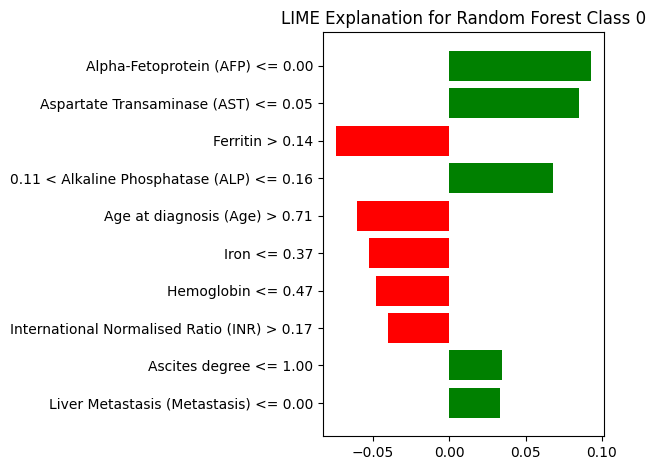

In [ ]:
# !pip install lime

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the Random Forest model
rf_model.fit(X_train_xgb, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_xgb)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# LIME Implementation
# Convert to numpy arrays
X_train_array = np.array(X_train_xgb)
X_test_array = np.array(X_test_xgb)

# Define the predict_proba function for Random Forest
def predict_proba_rf(X):
    return rf_model.predict_proba(X)

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train_array,
    feature_names=X_train_xgb.columns,
    class_names=['Class 0', 'Class 1'],  # Adjust for your classes
    mode='classification'
)

# Explain a prediction
sample_instance = X_test_array[0]  # Choose an instance to explain

exp = explainer.explain_instance(
    sample_instance,
    predict_proba_rf,  # Use Random Forest's predict_proba
    num_features=10
)

# Plot the explanation
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.title("LIME Explanation for Random Forest Class 0")
plt.show()


## Lime (Class 1)

Accuracy: 0.7576

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.75      0.90      0.82        20

    accuracy                           0.76        33
   macro avg       0.76      0.72      0.73        33
weighted avg       0.76      0.76      0.75        33


Confusion Matrix:
[[ 7  6]
 [ 2 18]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


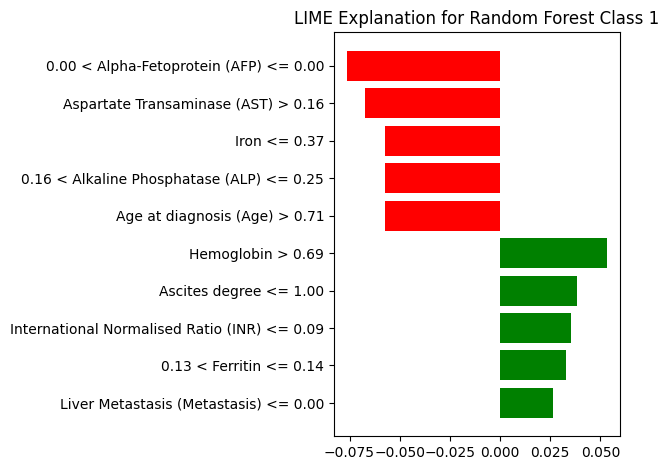

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=177)

# Train the Random Forest model
rf_model.fit(X_train_xgb, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_xgb)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# LIME Implementation
# Convert to numpy arrays
X_train_array = np.array(X_train_xgb)
X_test_array = np.array(X_test_xgb)

# Use the predict_proba function for Random Forest
def predict_proba_rf(X):
    return rf_model.predict_proba(X)

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train_array,
    feature_names=X_train_xgb.columns,
    class_names=['Class 0', 'Class 1'],  # Adjust for your classes
    mode='classification'
)

# Explain a prediction for a specific instance
sample_instance = X_test_array[1]  # Choose an instance to explain

exp = explainer.explain_instance(
    sample_instance,
    predict_proba_rf,  # Use Random Forest's predict_proba
    num_features=10
)

# Plot the explanation, focusing on Class 1
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.title("LIME Explanation for Random Forest Class 1")
plt.show()
